Import Libraries

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Import Dataset

In [2]:
df = pd.read_csv('mbti_1.csv')

Split into Training and Test sets

In [3]:
train_data, test_data, train_labels, test_labels = train_test_split(
    df['posts'], df['type'], test_size=0.2, random_state=42
)

Convert text data to feature vectors using CountVectorizer

In [4]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data)
X_test = vectorizer.transform(test_data)

Define parameter grid for hyperparameter tuning

In [5]:
param_grid = {
    'alpha': [0.05, 0.1, 0.2, 0.5, 1.0, 2.0],
}

Initialize and train the Multinomial Naive Bayes model

In [6]:
naive_bayes_model = MultinomialNB()

Use GridSearchCV to find the best hyperparameters

In [7]:
grid_search = GridSearchCV(estimator=naive_bayes_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, train_labels)
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'alpha': 0.1}


Make predictions on the test set using the best model

In [8]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Evaluate the model

In [9]:
accuracy = accuracy_score(test_labels, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.48


Display additional evaluation metrics

In [10]:
print(classification_report(test_labels, predictions))

              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        41
        ENFP       0.49      0.50      0.49       125
        ENTJ       0.50      0.05      0.08        44
        ENTP       0.51      0.32      0.39       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.00      0.00      0.00        15
        INFJ       0.43      0.61      0.51       288
        INFP       0.49      0.68      0.57       370
        INTJ       0.40      0.50      0.45       193
        INTP       0.57      0.61      0.59       293
        ISFJ       0.00      0.00      0.00        45
        ISFP       0.08      0.02      0.03        53
        ISTJ       1.00      0.05      0.09        44
        ISTP       0.50      0.18      0.26        67

    accuracy                           0.48      1735
   macro avg       0.31   

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

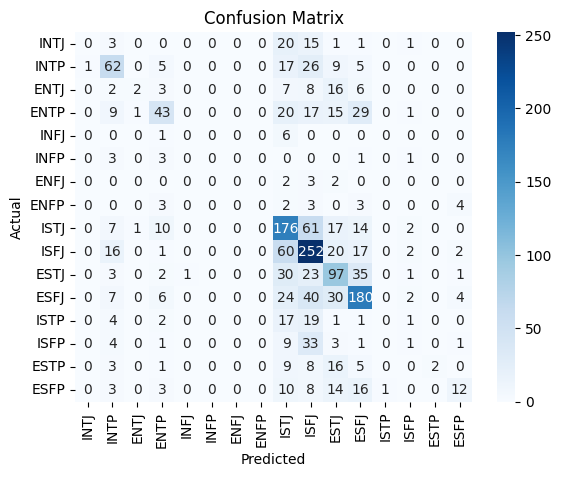

In [20]:
# Assuming you already have the best model and predictions
predictions = best_model.predict(X_test)

# Generate a confusion matrix
conf_matrix = confusion_matrix(test_labels, predictions)

mbti_types = ['INTJ', 'INTP', 'ENTJ', 'ENTP', 'INFJ', 'INFP', 'ENFJ', 'ENFP', 'ISTJ', 'ISFJ', 'ESTJ', 'ESFJ', 'ISTP', 'ISFP', 'ESTP', 'ESFP']

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mbti_types, yticklabels=mbti_types)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

To consider: percent of incorrect predictions that were only 1 trait off

In [39]:
# Function to check if actual vs. predicted MBTI types are only a letter different
def is_one_letter_different(actual, predicted):
    differences = sum(c1 != c2 for c1, c2 in zip(actual, predicted))
    return differences == 1

# Iterate through the confusion matrix and identify instances
total_one_letter_away_count = 0

for i in range(len(mbti_types)):
    for j in range(len(mbti_types)):
        if i != j and is_one_letter_different(mbti_types[i], mbti_types[j]):
            total_one_letter_away_count += conf_matrix[i, j]

total_incorrect_count = conf_matrix.sum() - np.trace(conf_matrix)  # Total incorrect predictions

percentage_one_letter_away = (total_one_letter_away_count / total_incorrect_count) * 100

print(f'Percentage of incorrect classifications that are only 1 MBTI letter away: {percentage_one_letter_away:.2f}%')



Percentage of incorrect classifications that are only 1 MBTI letter away: 50.00%
